# Data Exploration Code-Along

Implement the code-blocks below in order to explore some common data-exploration techniques. We will be using the `realestate.csv` file.

In [357]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [358]:
# TODO: Load in your data from `../../data/realestate.csv`

df = pd.read_csv("realestate.csv")

In [359]:
# TODO: Observe first 5 rows

df.head()

,house age,distance_to_mrt,num_convenience_stores,price_per_unit_area,num_of_rooms,pet_friendly
0,19.5,306.5947,9.0,42.2,2,No
1,13.3,561.9845,5.0,47.3,2,No
2,13.3,561.9845,5.0,54.8,4,No
3,5.0,390.5684,5.0,43.1,3,No
4,7.1,2175.0300,3.0,32.1,3,Yes


In [360]:
# Gives info on data set

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   house age               334 non-null    float64
 1   distance_to_mrt         334 non-null    float64
 2   num_convenience_stores  334 non-null    float64
 3   price_per_unit_area     334 non-null    float64
 4   num_of_rooms            334 non-null    int64  
 5   pet_friendly            334 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 15.8+ KB


In [361]:
# Check if theres null values 

df.isna()

# Add up all the null values

df.isna().sum()

house age                 0
distance_to_mrt           0
num_convenience_stores    0
price_per_unit_area       0
num_of_rooms              0
pet_friendly              0
dtype: int64

In [362]:
# row & column
df.loc[:, 'distance_to_mrt']

0       306.59470
1       561.98450
2       561.98450
3       390.56840
4      2175.03000
          ...    
329     372.13860
330      90.45606
331     390.96960
332     104.81010
333      90.45606
Name: distance_to_mrt, Length: 334, dtype: float64

In [363]:
df.iloc[:, 1]

0       306.59470
1       561.98450
2       561.98450
3       390.56840
4      2175.03000
          ...    
329     372.13860
330      90.45606
331     390.96960
332     104.81010
333      90.45606
Name: distance_to_mrt, Length: 334, dtype: float64

In [364]:
# TODO: describe tukey's numbers

df.describe()

,house age,distance_to_mrt,num_convenience_stores,price_per_unit_area,num_of_rooms
count,334.000000,334.000000,334.000000,334.000000,334.000000
mean,17.533234,812.824629,4.880240,40.295509,2.814371
std,11.775630,984.274974,2.552282,12.756827,1.513196
min,0.000000,23.382840,1.000000,7.600000,1.000000
25%,7.800000,279.172600,3.000000,31.100000,1.250000
50%,15.600000,443.967700,5.000000,40.300000,3.000000
75%,29.250000,967.400000,7.000000,47.850000,4.000000
max,43.800000,6488.021000,10.000000,117.500000,6.000000


<Axes: ylabel='Frequency'>

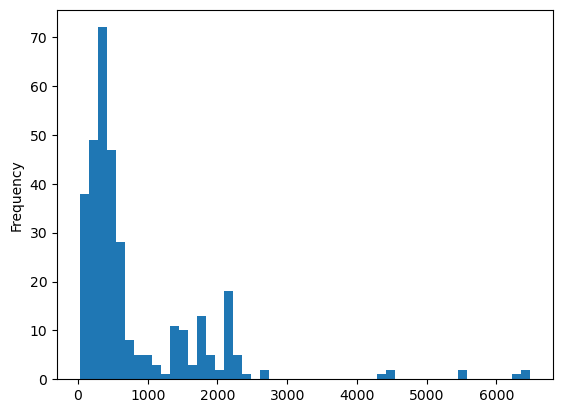

In [365]:
df["distance_to_mrt"].plot.hist(bins=50)

# bi_modial distrubution (multi-mode distrubution meaning more than one mode)


Right skewed, massively postive outliers (consider removal)
possibly 2 clusters within dataset

Using bins is like zooming in and seeing more of your data

with bins(30) you can clealy see your outliers 


<Axes: ylabel='Frequency'>

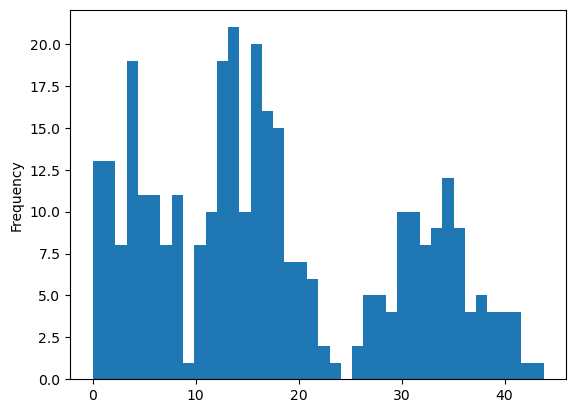

In [366]:
df["house age"].plot.hist(bins=40)

# also bimodial distrubution - see 2 clusters distubiton 

possibly 2 clusters within dataset

with bins(40) you can see its actually 3 clusters 

<Axes: xlabel='house age', ylabel='price_per_unit_area'>

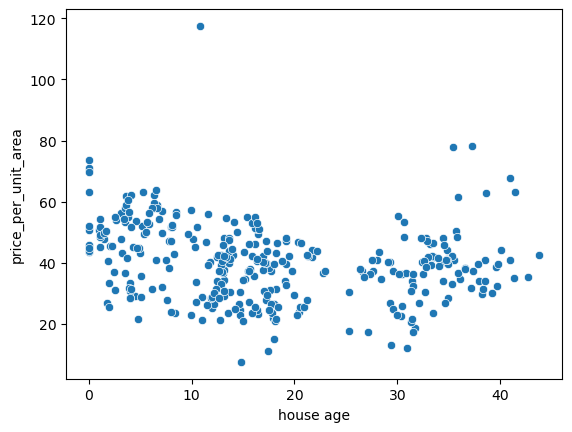

In [367]:
sns.scatterplot(data=df, x="house age", y="price_per_unit_area")

# x axis dependent & y a xis independent 

See a negative and positive coorelation

<Axes: ylabel='Frequency'>

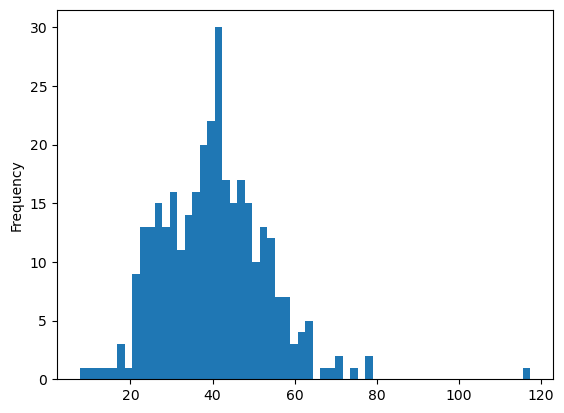

In [368]:
df["price_per_unit_area"].plot.hist(bins=60)

right-skew normal distribution

with bins(60) you can definetly see its a normal distribution

<Axes: ylabel='Frequency'>

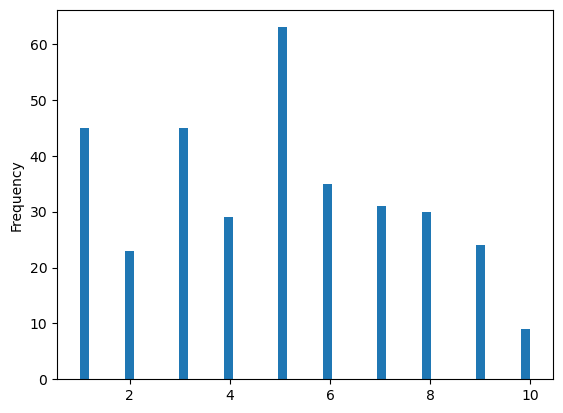

In [369]:
df["num_convenience_stores"].plot.hist(bins=50)

not skewed - normal distribution

bins(50) turned it to a bar chart

<Axes: xlabel='num_convenience_stores'>

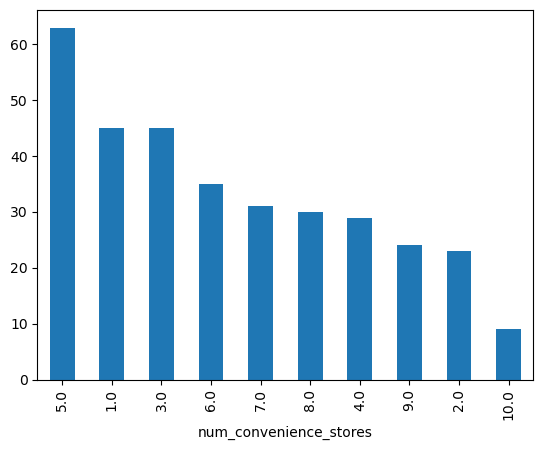

In [370]:
df.value_counts("num_convenience_stores").plot.bar()

<Axes: xlabel='pet_friendly'>

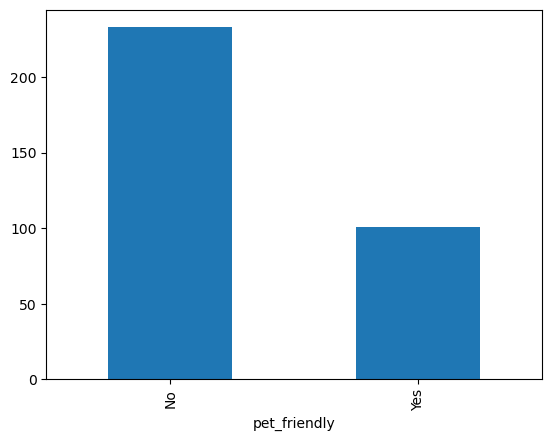

In [371]:
df.value_counts("pet_friendly").plot.bar()

<Axes: xlabel='num_of_rooms'>

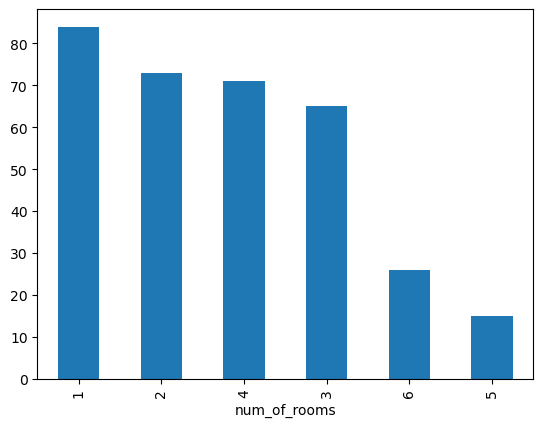

In [372]:
df.value_counts("num_of_rooms").plot.bar()

In [373]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   house age               334 non-null    float64
 1   distance_to_mrt         334 non-null    float64
 2   num_convenience_stores  334 non-null    float64
 3   price_per_unit_area     334 non-null    float64
 4   num_of_rooms            334 non-null    int64  
 5   pet_friendly            334 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 15.8+ KB


num_of_rooms is categorical so it should be int64
object is essentially a string data type 

<Axes: xlabel='num_of_rooms', ylabel='price_per_unit_area'>

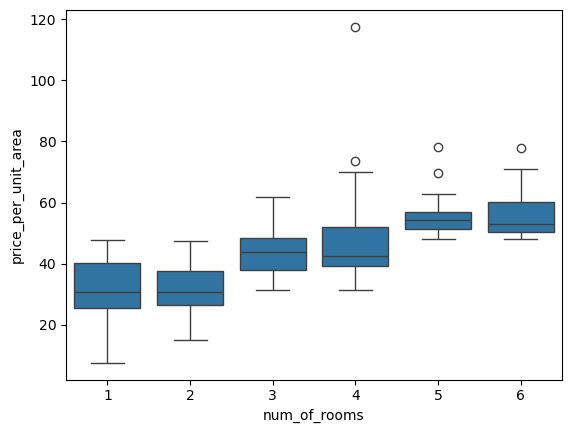

In [374]:
# use seaborn to create a boxplot (must be categorical and continuous)

sns.boxplot(data=df, x="num_of_rooms", y="price_per_unit_area")

look at median

price per unit area increses by num of rooms

It seems that as we have more rooms in the apt the price of rooms go up 

<Axes: xlabel='num_convenience_stores', ylabel='price_per_unit_area'>

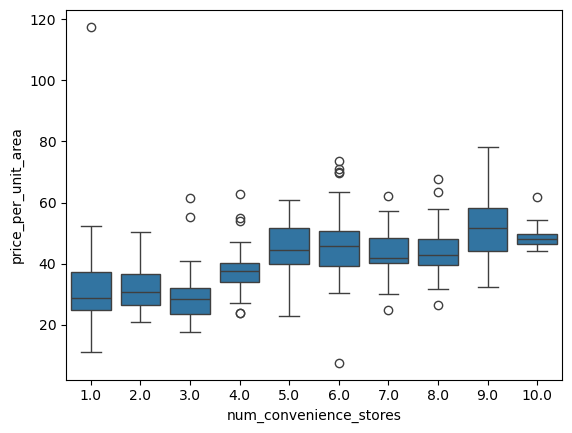

In [375]:
sns.boxplot(data=df, x="num_convenience_stores", y="price_per_unit_area")

if median lower end of the box plot near Q1 indicates right skewed

if median higher end of the box plot near Q3 indicates left skewed

<Axes: xlabel='pet_friendly', ylabel='price_per_unit_area'>

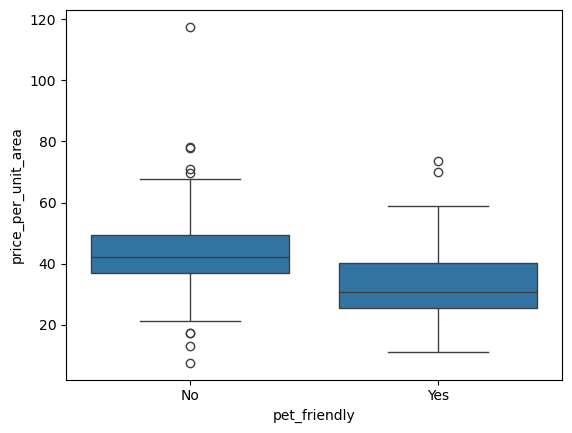

In [376]:
sns.boxplot(data=df, x="pet_friendly", y="price_per_unit_area")

Please note if it falls outside the box plot its an outlier

In [377]:
# TODO: count the frequency of unique values in the "num_of_rooms" column, save this value into a new dataframe named "room_counts"
# Documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html

room_counts = df.value_counts("num_of_rooms")
room_counts

num_of_rooms
1    84
2    73
4    71
3    65
6    26
5    15
Name: count, dtype: int64

In [378]:
df.groupby("num_of_rooms")["price_per_unit_area"].mean()

num_of_rooms
1    31.438095
2    31.901370
3    44.372308
4    46.774648
5    56.386667
6    55.311538
Name: price_per_unit_area, dtype: float64

The price increase based on the num of rooms

In [379]:
df.groupby("num_of_rooms")["house age"].mean()

num_of_rooms
1    19.591667
2    19.232877
3    17.449231
4    16.242254
5    12.160000
6    12.946154
Name: house age, dtype: float64

more rooms the lower the house age

In [380]:
df.groupby("num_of_rooms")["distance_to_mrt"].mean()

num_of_rooms
1    1303.687553
2    1291.450847
3     404.395853
4     440.108801
5     224.825287
6     261.227895
Name: distance_to_mrt, dtype: float64

more rooms it has the closer it is to mass transprtation

outliers might be skewing the data

In [381]:
df.groupby("pet_friendly")["house age"].mean()

pet_friendly
No     18.192275
Yes    16.012871
Name: house age, dtype: float64

newer apartments are more pet friendly

In [382]:
# I want to calculate the avg num of convenience stores next to different types of pet friendly apartment
df.groupby("pet_friendly")["num_convenience_stores"].mean()

pet_friendly
No     5.489270
Yes    3.475248
Name: num_convenience_stores, dtype: float64

More pet friendly less convience stores

In [383]:
df.groupby("pet_friendly").mean()

,house age,distance_to_mrt,num_convenience_stores,price_per_unit_area,num_of_rooms
pet_friendly,,,,,
No,18.192275,520.536241,5.489270,43.244206,3.055794
Yes,16.012871,1487.113683,3.475248,33.493069,2.257426


In [384]:
# Will drop null values

# df_dropped = df.dropna()

# This will check if we really dropped vaules
# df_dropped.isna().sum()

In [385]:
# Don't save to variable, isna.sum will return to a none type, this really limits you

# df.dropna(inplace=True)

# Basic Pandas 

Let's tackle questions 1-5 as a group (co-coding). We will call on you randomly to solve these programming problems. Think of this as an equivalent of programming interview questions.

In [386]:
import pandas as pd
import numpy as np

data = {
    "type": ["Robusta", "Arabica", "Robusta", "Arabica", "Arabica"],
    "amount_kg": [10, 100, 20, 50, 80],
    "destination": ["US", "US", "JP", "DE", "US"],
    "unit_price": [3.264, 4.473, 3.293, 4.573, 4.473]
}

df = pd.DataFrame(data)

In [387]:
df

,type,amount_kg,destination,unit_price
0,Robusta,10,US,3.264
1,Arabica,100,US,4.473
2,Robusta,20,JP,3.293
3,Arabica,50,DE,4.573
4,Arabica,80,US,4.473


In [388]:
df.to_csv("new.csv", index=False)

In [389]:
# Q1
# TODO: Use a pandas method on `df` to count the frequency of orders by countries in this dataset

...

Ellipsis

In [390]:
# Q2
# TODO: Use a pandas method on `df` to calculate the mean amount_kg ordered

df.loc[:, 'amount_kg'].mean()

df["amount_kg"].mean()

52.0

In [391]:
# Q3
# TODO: Use a pandas method on `df` to calculate the median unit_price

...

Ellipsis

# Split Apply Combine

Questions 1-3 build off the previous code-blocks.

In [392]:
# Q1
# TODO: Calculate the mean unit_price for each destination

...

Ellipsis

In [393]:
# Q2
# TODO: Calculate the mean amount_kg for each type

...

Ellipsis

In [394]:
# Q2
# TODO: Calculate the mean unit_price for each destination & type

...

Ellipsis

# Resampling

We will tackle questions 1-3 as a group (co-coding). We will call on you randomly to solve these programming problems. Think of this as an equivalent of programming interview questions.

In [395]:
df = pd.read_csv("tweets.csv")
df.head()

,sentiment,id,date,NO_QUERY,user,tweet
0,0,1548276360,Fri Apr 17 20:30:47 PDT 2009,NO_QUERY,customcanvasart,@USEOFFORCEENT so sorry for your loss honey I...
1,0,1548276887,Fri Apr 17 20:30:54 PDT 2009,NO_QUERY,KuppyKakejEs,Getting hair done tomorrow.Nawt exicted at all.
2,0,1548276901,Fri Apr 17 20:30:55 PDT 2009,NO_QUERY,zoeydecay,Bored watching Law and Order. Wanting sunday t...
3,0,1548277792,Fri Apr 17 20:31:04 PDT 2009,NO_QUERY,leabella,Actually I had 503 maybe I should put my web...
4,0,1548277960,Fri Apr 17 20:31:05 PDT 2009,NO_QUERY,AnitaKoch,"@lkhalladay Colorado's a beautiful state, but ..."


In [396]:
# Q1
# TODO: Convert the `date` column into a datetime data-type

df["date"] = pd.to_datetime(df["date"])

df.set_index('date', inplace=True)

df.head()

/var/folders/8s/6z8k89ls5219_662hzy190h80000gn/T/ipykernel_10113/1353756450.py:4: FutureWarning: Parsed string "Fri Apr 17 20:30:47 PDT 2009" included an un-recognized timezone "PDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df["date"] = pd.to_datetime(df["date"])


,sentiment,id,NO_QUERY,user,tweet
date,,,,,
2009-04-17 20:30:47,0,1548276360,NO_QUERY,customcanvasart,@USEOFFORCEENT so sorry for your loss honey I...
2009-04-17 20:30:54,0,1548276887,NO_QUERY,KuppyKakejEs,Getting hair done tomorrow.Nawt exicted at all.
2009-04-17 20:30:55,0,1548276901,NO_QUERY,zoeydecay,Bored watching Law and Order. Wanting sunday t...
2009-04-17 20:31:04,0,1548277792,NO_QUERY,leabella,Actually I had 503 maybe I should put my web...
2009-04-17 20:31:05,0,1548277960,NO_QUERY,AnitaKoch,"@lkhalladay Colorado's a beautiful state, but ..."


In [397]:
# Q2
# TODO: Resample according to 1-day and calculate the mean sentiment of each day

# df.resample("1D")["sentiment"].mean().plot()

daily_sentiment = df.resample("1D")["sentiment"].mean()

daily_sentiment.to_csv("daily_sentiment.csv")

<Axes: xlabel='date'>

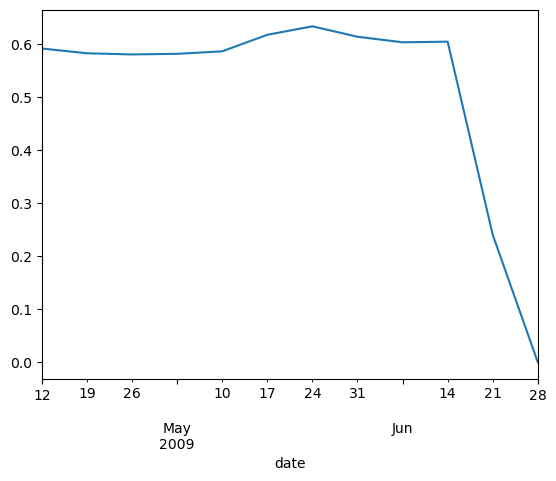

In [398]:
weekly_sentiment = df.resample("1W")["sentiment"].mean()

weekly_sentiment.plot()

In [399]:
# Q3
# TODO: Resample according to a rolling window of 3-days and calculate the mean sentiment of period

...

Ellipsis